# PROYECTO DE ANÁLISIS DE ALGORITMOS - Primer punto

(LP) Suponga que se planea construir una nueva cadena de tiendas en una ciudad dada, usted tiene identificado una serie de ubicaciones potenciales en diferentes barrios. Además, asuma que la demanda de productos en cada barrio de la ciudad es conocida. Si usted quiere construir exactamente k tiendas, ¿dónde debería localizarlas de forma que minimice la distancia promedio de los clientes? ¿Si en lugar usted dese construir una cantidad variable de tiendas, y el costo de construir una tienda en cada sitio es conocido, ¿dónde debería construir las tiendas de forma que minimice el costo total de la construcción y la distancia promedio de los clientes?


# Algoritmo de FloydWarshall

In [6]:
import numpy as np

In [60]:
def FloydWarshall(W):
    n = W.shape[0]
    D_list = []#Save each D^{(k)} matrix
    D_list.append(W[:,:])#D^{(0)}
    for k in range(n):        
        D_k = D_list[k][:,:]
        for i in range(n):
            for j in range(n):
                D_k[i,j] = min(D_list[k][i,j], D_list[k][i,k]+D_list[k][k,j])        
        D_list.append(np.copy(D_k))
    return D_k, D_list

In [55]:
from itertools import count, product, islice
from string import ascii_uppercase

def multiletters(seq):
    for n in count(1):
        for s in product(seq, repeat=n):
            yield ''.join(s)

# Cálculo sin costos

In [56]:
def tienda(ki,W,nombres):
    D_n, Ds = FloydWarshall(W)
    W = D_n
    C = [['' , D_n]];
    cont = 0;
    for f in range(1,ki):
        cont = cont + len(nombres) ** f
    lista = list(islice(multiletters(nombres), cont))
    
    for p  in range(len(lista)): 
        cad = lista[p];
        co = cad[len(cad)-1];
        for w in range(len(nombres)):
            if(co == nombres[w]):
                j = w;
        #cad = nombres[j];
        ca = cad[:len(cad)-1];


        #busca la cadena en la lista y obtiene la matriz
        for k in range(len(C)):
            if(C[k][0] == ca):
                mati = C[k][1]

        m = np.ones((len(W),len(W))) * 9999

        for l in range(len(W)):   
            for k in range(len(W)):
                m[k,l] = min(mati[k,j] , W[k,l] );

        temp = [cad , m];
        C.append(temp);
   
    
    cont = 0;
    for f in range(1,ki-1):
      
        cont = cont + len(nombres) ** f
        
    minimo = 99999;
    columna = [];
    
    for i in range(cont,len(C)):
        mx = C[i][1];
        for j in range(len(W)):
            conti = 0;
            for k in range(len(W)):
                conti = conti + mx[k,j];
            if(conti <= minimo):
                minimo = conti;
                columna = mx[:,j];
    
    print "Minima distancia ",minimo
    print "Columna" , columna
    
    print"Tiendas Escogidas: "
    for i in range(len(columna)):
        if(columna[i]==0):
            print nombres[i];
    
    

# Cálculo con costos

In [5]:
def tiendaCostos(ki,W,nombres,costos):
    D_n, Ds = FloydWarshall(W)
    W = D_n
    C = [['' , D_n]];
    cont = 0;
    for f in range(1,ki):
        cont = cont + len(nombres) ** f
    lista = list(islice(multiletters(nombres), cont))
    
    for p  in range(len(lista)): 
        cad = lista[p];
        co = cad[len(cad)-1];
        for w in range(len(nombres)):
            if(co == nombres[w]):
                j = w;
        #cad = nombres[j];
        ca = cad[:len(cad)-1];


        #busca la cadena en la lista y obtiene la matriz
        for k in range(len(C)):
            if(C[k][0] == ca):
                mati = C[k][1]

        m = np.ones((len(W),len(W))) * 9999

        for l in range(len(W)):   
            for k in range(len(W)):
                m[k,l] = min(mati[k,j] , W[k,l] );

        temp = [cad , m];
        C.append(temp);
    
    cont = 0;
    for f in range(1,ki-1):
        
        cont = cont + len(nombres) ** f
        
    minimo = 99999;
    columna = [];

    #if cont <> 0:
    #    cont = cont + 1
    for i in range(cont,len(C)):
        mx = C[i][1];
        for j in range(len(W)):
            conti = 0;
            for k in range(len(W)):
                conti = conti + mx[k,j];
                if(mx[k,j] == 0):
                    conti = conti + costos[k]
            if(conti <= minimo):
                minimo = conti;
                columna = mx[:,j];
    
    print "Minima distancia ",minimo
    print "Columna" , columna
    
    print"Tiendas Escogidas: "
    for i in range(len(columna)):
        if(columna[i]==0):
            print nombres[i];
    
    

# Lectura de archivos sin costo

In [6]:
def leerSinCosto(archivo):
    file = open(archivo, "r") 
    k=int(file.readline())
    cont=0
    linea=file.readline()
    total=0
    lista=[]
    nombres=[]
    while linea:
        cont=0
        for w in linea.split():
            if cont==0:
                total+=1
                cont+=1
                nombres.append(w)
            else:
                lista.append(w)
        linea=file.readline()
    matriz=np.zeros((total, total))
    i=0
    j=0
    for l in lista:
        matriz[j][i]=l
        i+=1
        if i==total:
            j+=1
            i=0
    return (k,matriz,nombres)


# Lectura de archivos con costo

In [7]:
def leerConCosto(archivo):
    file = open(archivo, "r") 
    k=int(file.readline())
    cont=0
    linea=file.readline()
    total=0
    lista=[]
    nombres=[]
    costo=[]
    while linea:
        cont=0
        for w in linea.split():
            if cont==0:
                total+=1
                cont+=1
                nombres.append(w)
            elif cont==1:
                costo.append(int(w))
                cont+=1
            else:
                lista.append(w)
        linea=file.readline()
    matriz=np.zeros((total, total))
    i=0
    j=0
    for l in lista:
        matriz[j][i]=l
        i+=1
        if i==total:
            j+=1
            i=0
       
    return (k,matriz,nombres,costo)

# Caso 1

<h3>Sin costo</h3>

In [8]:
k1,matriz1,nombres1=leerSinCosto("input_n5_k1")
tienda(k1,matriz1,nombres1);

Minima distancia  23.0
Columna [ 6.  0.  9.  8.]
Tiendas Escogidas: 
B


<h3>Con costo</h3>

In [9]:
k1b,matriz1b,nombres1b,costos1b=leerConCosto("input_n5_k1_c")
tiendaCostos(k1b,matriz1b,nombres1b,costos1b);

Minima distancia  39.0
Columna [ 6.  0.  9.  8.]
Tiendas Escogidas: 
B


# Caso 2

<h3>Sin costo</h3>

In [10]:
k2,matriz2,nombres2=leerSinCosto("input_n5_k2")
tienda(k2,matriz2,nombres2);

Minima distancia  8.0
Columna [ 0.  6.  0.  2.]
Tiendas Escogidas: 
A
C


<h3>Con costo</h3>

In [11]:
k2b,matriz2b,nombres2b,costos2b=leerConCosto("input_n5_k2_c")
tiendaCostos(k2b,matriz2b,nombres2b,costos2b);

Minima distancia  39.0
Columna [ 6.  0.  9.  8.]
Tiendas Escogidas: 
B


# Caso 3

<h3>Sin costo</h3>

In [12]:
k3,matriz3,nombres3=leerSinCosto("input_n5_k3")
tienda(k3,matriz3,nombres3);

Minima distancia  2.0
Columna [ 2.  0.  0.  0.]
Tiendas Escogidas: 
B
C
D


<h3>Con costo</h3>

In [13]:
k3b,matriz3b,nombres3b,costos3b=leerConCosto("input_n5_k3_c")
tiendaCostos(k3b,matriz3b,nombres3b,costos3b);

Minima distancia  39.0
Columna [ 6.  0.  9.  8.]
Tiendas Escogidas: 
B


# Análisis de Complejidad

In [81]:
def tiendasola(ki,W,nombres):
    D_n, Ds = FloydWarshall(W)
    W = D_n
    C = [['' , D_n]];
    cont = 0;
    for f in range(1,ki):
        cont = cont + len(nombres) ** f
    lista = list(islice(multiletters(nombres), cont))
    
    for p  in range(len(lista)): 
        cad = lista[p];
        co = cad[len(cad)-1];
        for w in range(len(nombres)):
            if(co == nombres[w]):
                j = w;
        #cad = nombres[j];
        ca = cad[:len(cad)-1];


        #busca la cadena en la lista y obtiene la matriz
        for k in range(len(C)):
            if(C[k][0] == ca):
                mati = C[k][1]

        m = np.ones((len(W),len(W))) * 9999

        for l in range(len(W)):   
            for k in range(len(W)):
                m[k,l] = min(mati[k,j] , W[k,l] );

        temp = [cad , m];
        C.append(temp);
   
    
    cont = 0;
    for f in range(1,ki-1):
      
        cont = cont + len(nombres) ** f
        
    minimo = 99999;
    columna = [];
    
    for i in range(cont,len(C)):
        mx = C[i][1];
        for j in range(len(W)):
            conti = 0;
            for k in range(len(W)):
                conti = conti + mx[k,j];
            if(conti <= minimo):
                minimo = conti;
                columna = mx[:,j];

In [89]:
import time
import pylab as pl
%matplotlib inline


def aleatorio(n):
    nombres= [];
    results = []
    nombres.append(str(1));
    for i in range(2,n):
        nombres.append(str(i));
        matriz = llenar(i);
        #print matriz
        #print nombres
        for j in range(1,n-1):
            tic = time.clock()
            tiendasola(j,matriz,nombres);
            toc = time.clock()
            results.append((toc-tic)*100)
    return results;

In [93]:
import random

def llenar(n):
    mat = np.zeros((n , n) );
    for i in range(n):
        for j in range(n):
            if(i <> j):
                a = random.randrange(0.0,100.0)
                mat[i,j] = a;
    return mat;
                
                

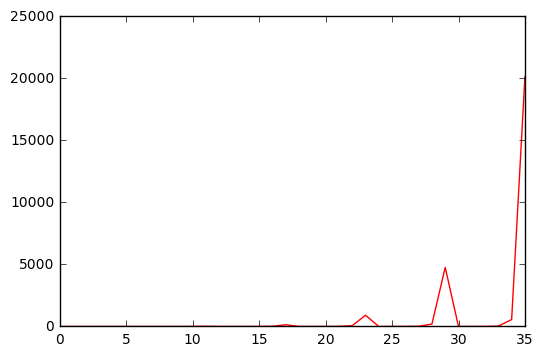

In [102]:
resultados = aleatorio(8);
x = np.arange(len(resultados))
y = np.array(resultados)
pl.plot(x, y,color='red')  

Cada uno de los picos representa el máximo tiempo de ejecucion de grafos, variando su tamaño y el número de tiendas

Se observan 4 picos, para grafos de tamaño 5, 6, 7 y 8